In [29]:
#Load required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

#Get current working directory (.\\notebooks) -----HR
cwd = os.getcwd()

#Get parent folder to access (.\\Data) -----HR
parent = os.path.dirname(cwd)

#Get file path to load into environment -----HR
file_path = os.path.join(parent,"Data","stock_and_econ.xlsx")

#Load data into environment using the file path variable with appropriate relative path -----HR
df= pd.read_excel(file_path)

In [30]:
#Print shape and head of the dataset -----AP
print("Shape of the dataset:", df.shape)  # Number of rows and columns
print("First 5 rows of the dataset:")
print(df.head())  # Display the first 5 rows

Shape of the dataset: (41439, 49)
First 5 rows of the dataset:
  Ticker                Long Name As Of Date Quarter  Year  Label  \
0    MMM                    3M CO 2024-12-31      Q4  2024      0   
1    ABT      ABBOTT LABORATORIES 2024-12-31      Q4  2024      0   
2   ABBV               ABBVIE INC 2024-12-31      Q4  2024      0   
3  ACNCL       ACCENTURE PLC-CL A 2024-12-31      Q4  2024      0   
4   ATVI  ACTIVISION BLIZZARD INC 2024-12-31      Q4  2024      0   

   Market Value (%)   Div Yld        P/E       P/CF  ...  GDP CYOY Index  \
0          0.112978  2.169029  12.125959  36.257446  ...             2.5   
1          0.098993  2.086464  31.060309  22.592426  ...             2.5   
2          0.155521  3.691615  23.327688  19.046702  ...             2.5   
3          0.307883  1.682822  28.674432  22.861091  ...             2.5   
4               NaN       NaN        NaN        NaN  ...             2.5   

   EHUPUS Index  CONCCONF Index  USYC2Y10 Index  CSI BARC Index  

In [31]:
# Step 2: Check for missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage.sort_values(ascending=False))

Percentage of missing values in each column:
Inv Gr              40.119211
Div Yld             33.067883
Work Cap Gr         30.490601
FCF Gr_2            28.082241
P/FCF               27.614083
FCF Gr              27.071117
ROC                 22.686358
Current Ratio       22.220613
P/EBITDA            21.462873
Div Pay Ratio       20.415551
5yr Avg P/E         19.788122
BEst Div Yld        18.912136
EBITDA Gr           18.557398
Debt/EBITDA         17.131205
Earn Yld            17.015372
P/E                 17.015372
P/CF                15.463694
P/B                 14.942446
FCF Yld             14.754217
ROE                 14.604600
Free CF             13.443857
Debt/Equity         12.847800
CF Gr               11.595357
Op Inc Gr           11.332320
Net Inc Gr          11.095828
Op Margin           10.835204
ROA                 10.789353
Profit Margin       10.297063
Market Value (%)    10.166751
year_inco            3.928666
Sector               3.571515
CPI YOY Index        2.70

### Step 1: Data Cleaning and Preprocessing


#### Step 1a: Dropped columns that contained >30% missing values

In [32]:
#Columns were dropped that contained >30% missing values. Dropped columns are printed below -----AP 
# Columns like Inv Gr (40.12%) and Div Yld (33.07%) have a high percentage of missing values, dropping thise columns.
threshold = 30
columns_to_drop = missing_percentage[missing_percentage > threshold].index
df = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index(['Div Yld', 'Inv Gr', 'Work Cap Gr'], dtype='object')


#### Step 1b: For numerical columns with moderate or low missing values, impute the missing values using the mean.

In [33]:
#Step 3: Impute missing values for numerical columns -----HR
#Syntax update in df[col] = df[col] (removed inplace=TRUE) ensures the dataset is updated without triggering warnings and won't have any issues if pandas 3.0 is used. 
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean()) # Use mean for imputation

#### Step 1c: For categorical columns, impute missing values using the mode

In [34]:
# Step 4: Impute missing values for categorical columns ----HR
##Syntax update in df[col] = df[col] (removed inplace=TRUE) ensures the dataset is updated without triggering warnings and won't have any issues if pandas 3.0 is used.
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])  # Use mode for imputation

#### Step 1d: Verify imputations and dropped columns were correctly implemented

In [35]:
#Verify missing values after dropped columns and imputations -----AP
missing_percentage_after = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values after cleaning:")
print(missing_percentage_after.sort_values(ascending=False))

Percentage of missing values after cleaning:
Ticker              0.0
Long Name           0.0
As Of Date          0.0
Quarter             0.0
Year                0.0
Label               0.0
Market Value (%)    0.0
P/E                 0.0
P/CF                0.0
P/B                 0.0
Debt/Equity         0.0
Current Ratio       0.0
BEst Div Yld        0.0
ROE                 0.0
ROA                 0.0
Op Margin           0.0
Profit Margin       0.0
Debt/EBITDA         0.0
P/EBITDA            0.0
FCF Gr              0.0
FCF Yld             0.0
P/FCF               0.0
Div Pay Ratio       0.0
Free CF             0.0
Earn Yld            0.0
5yr Avg P/E         0.0
CF Gr               0.0
EBITDA Gr           0.0
FCF Gr_2            0.0
Net Inc Gr          0.0
Op Inc Gr           0.0
ROC                 0.0
FDTR Index          0.0
GT10 Govt           0.0
CPI YOY Index       0.0
PPI YOY Index       0.0
GDP CYOY Index      0.0
EHUPUS Index        0.0
CONCCONF Index      0.0
USYC2Y10 Index     

### Step 2: Handling duplicates

In [36]:
#Summary statistics for numerical columns -----AP
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
                          As Of Date          Year         Label  \
count                          41439  41439.000000  41439.000000   
mean   2016-08-30 13:01:12.714110208   2016.040759      0.011921   
min              2007-03-30 00:00:00   2007.000000      0.000000   
25%              2011-12-30 00:00:00   2011.000000      0.000000   
50%              2016-12-30 00:00:00   2016.000000      0.000000   
75%              2021-06-30 00:00:00   2021.000000      0.000000   
max              2024-12-31 00:00:00   2024.000000      1.000000   
std                              NaN      5.305317      0.108533   

       Market Value (%)           P/E          P/CF           P/B  \
count      41439.000000  41439.000000  41439.000000  41439.000000   
mean           0.198786     40.049009     23.104885      9.197545   
min            0.001032      0.302410      0.057633      0.113592   
25%            0.083366     15.490287      9.243300      2.051725   


#### Step 2a: Check for duplicate rows

In [37]:
# Step 4: Check for duplicate rows -----AP
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 2240


#### Step 2b: Drop duplicates

In [38]:
# Remove duplicate rows -----AP
df = df.drop_duplicates()
print(f"Shape of the dataset after removing duplicates: {df.shape}")

Shape of the dataset after removing duplicates: (39199, 46)


#### Step 2c: Verify No duplicate rows

In [39]:
# Verify that no duplicate rows remain -----AP
duplicate_rows_after = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_rows_after}")

Number of duplicate rows after removal: 0


#### Step 3: Data Structure 

In [40]:
#Check data types- this will aid in our analysis for future model implementation -----AP
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Ticker                      object
Long Name                   object
As Of Date          datetime64[ns]
Quarter                     object
Year                         int64
Label                        int64
Market Value (%)           float64
P/E                        float64
P/CF                       float64
P/B                        float64
Debt/Equity                float64
Current Ratio              float64
BEst Div Yld               float64
ROE                        float64
ROA                        float64
Op Margin                  float64
Profit Margin              float64
Debt/EBITDA                float64
P/EBITDA                   float64
FCF Gr                     float64
FCF Yld                    float64
P/FCF                      float64
Div Pay Ratio              float64
Free CF                    float64
Earn Yld                   float64
5yr Avg P/E                float64
CF Gr                      float64
EBITDA Gr                  f

In [41]:
#Analyze the distribution of the target variable -----AP
print("Distribution of the target variable:")
print(df['Label'].value_counts(normalize=True) * 100)

Distribution of the target variable:
Label
0    98.795888
1     1.204112
Name: proportion, dtype: float64


Severe class imbalance in the negative predictor. Only 1% of the total data is in the positive class. This will be handled in another notebook. 

### Step 4: Data Exploration

In [42]:
#Select cols for analysis----- AP
selected_columns = [
    'Market Value (%)', 'P/E', 'P/CF', 'P/B', 'Debt/Equity',
    'ROE', 'ROA', 'Profit Margin', 'FCF Gr', 'EBITDA Gr', 'Net Inc Gr',
    'GDP CYOY Index', 'CPI YOY Index', 'PPI YOY Index', 'VIX Index',
    'Sector', 'Year', 'Quarter', 'Label'
]

#Updates to df to include selected columns -----HR
df = df[selected_columns]

# Select only numerical columns----- AP
numerical_df = df.select_dtypes(include=['float64', 'int64'])

#Print numerical_df datatypes to confirm numerical 
print(numerical_df.dtypes)

Market Value (%)    float64
P/E                 float64
P/CF                float64
P/B                 float64
Debt/Equity         float64
ROE                 float64
ROA                 float64
Profit Margin       float64
FCF Gr              float64
EBITDA Gr           float64
Net Inc Gr          float64
GDP CYOY Index      float64
CPI YOY Index       float64
PPI YOY Index       float64
VIX Index           float64
Year                  int64
Label                 int64
dtype: object


#### Correlation Matrix

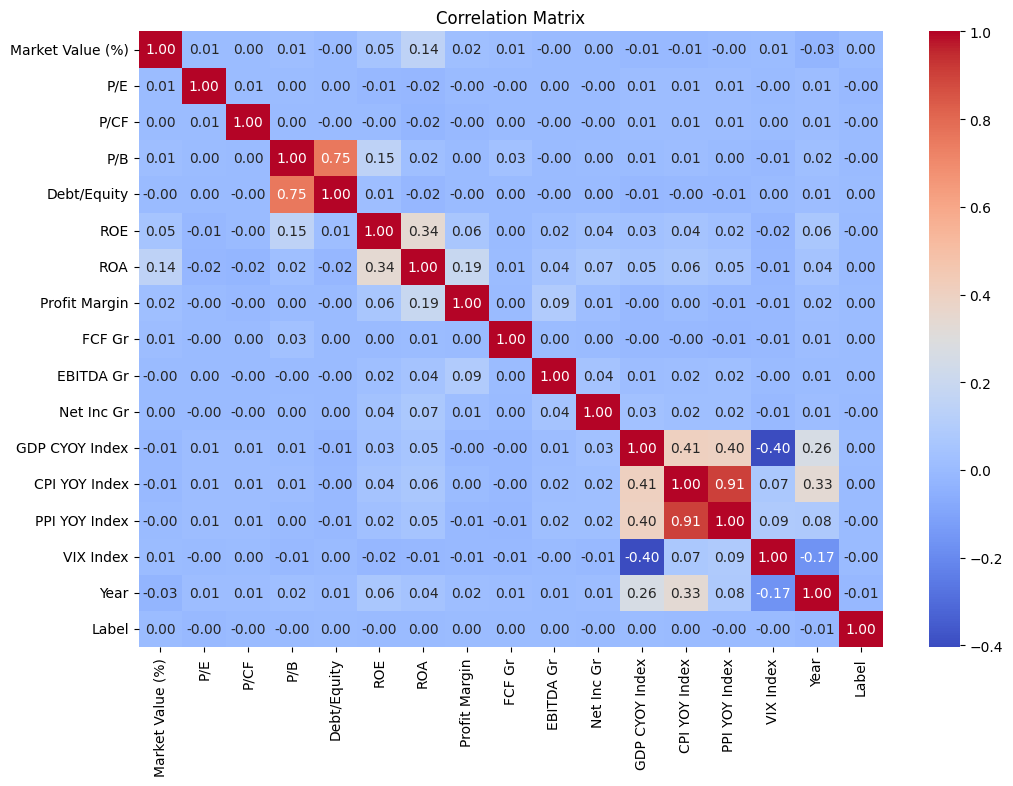

In [ ]:
#Correlation matrix -----AP
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

#### Scatterplot of CPI vs PPI YOY indexes

Since CPI YOY Index and PPI YOY Index are highly correlated, they may provide redundant information in your dataset. will drop one of the columns.
The points in the scatter plot form an upward trend, indicating a positive correlation between CPI YOY Index and PPI YOY Index.

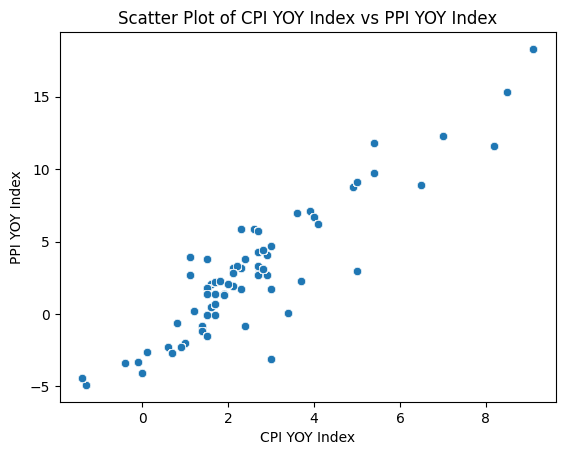

In [ ]:
#Scatterplot using seaborn. CPI on x and PPI on y. -----AP
sns.scatterplot(data=df, x='CPI YOY Index', y='PPI YOY Index')
plt.title("Scatter Plot of CPI YOY Index vs PPI YOY Index")
plt.show()

In [45]:
#PPI YOY dropped after analysis -----AP
df = df.drop(columns=['PPI YOY Index'])

#### Histogram of Numeric Features
P/E, P/CF, P/B, Debt/Equity, FCF Gr, , Profit Margin,Market value %
These features are highly right skewed , with most values concentraed near zero and few extreme outliers on the higher end.
We will consider handling outliers or applying transformations to reduce skewness.

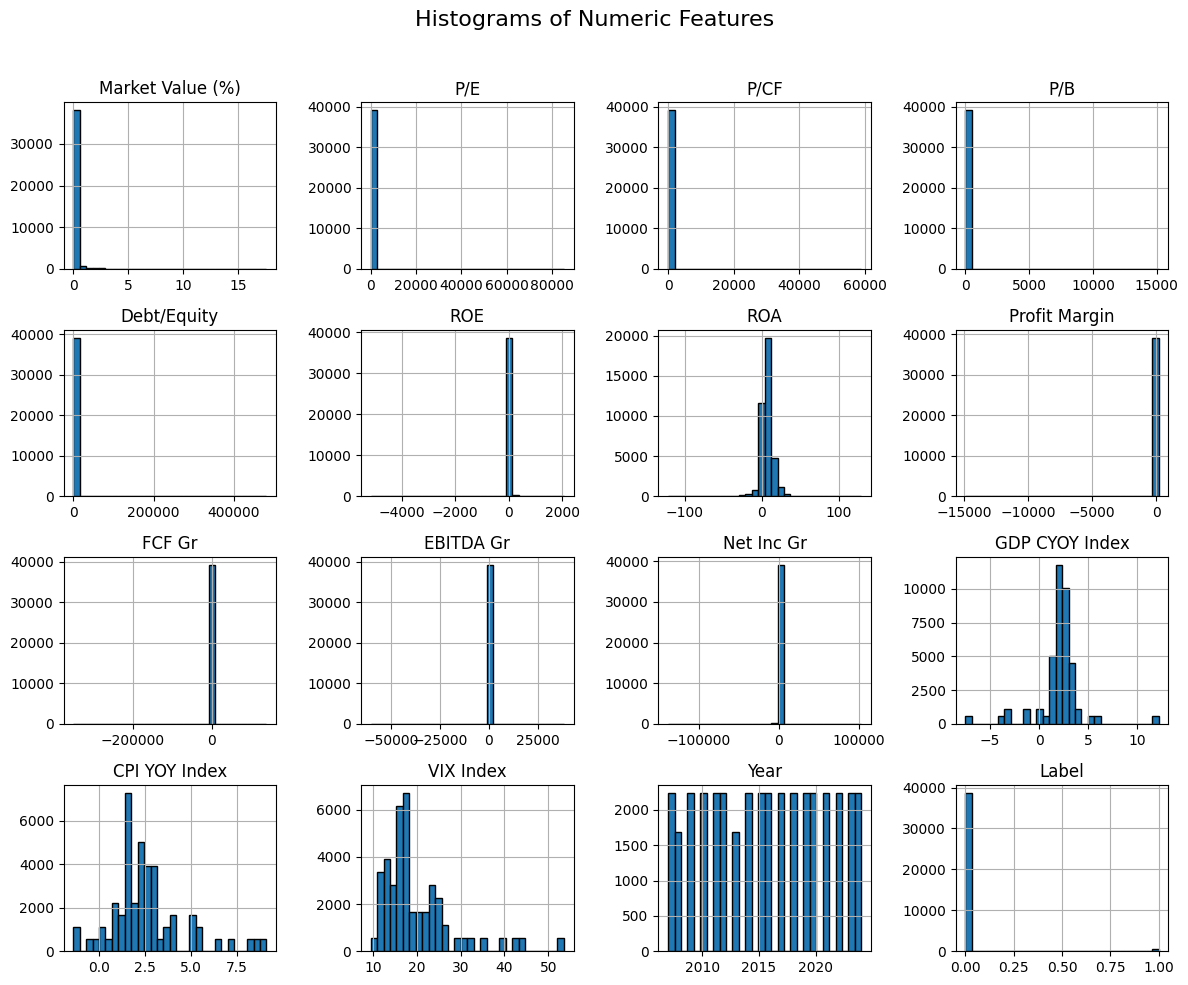

In [ ]:
#Histogram of all numeric features. -----AP
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [47]:
yearly_counts = df.groupby('Year')['Year'].count()
print(yearly_counts)
#missing quarter in 2008 and 2013

Year
2007    2239
2008    1680
2009    2240
2010    2240
2011    2240
2012    2240
2013    1680
2014    2240
2015    2240
2016    2240
2017    2240
2018    2240
2019    2240
2020    2240
2021    2240
2022    2240
2023    2240
2024    2240
Name: Year, dtype: int64


In [48]:
# Summary statistics for numeric variables
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns
numeric_summary = df[numeric_vars].describe().T
numeric_summary['Skewness'] = df[numeric_vars].skew()
numeric_summary['Kurtosis'] = df[numeric_vars].kurt()
print(numeric_summary)

                    count         mean          std            min  \
Market Value (%)  39199.0     0.199525     0.380817       0.001032   
P/E               39199.0    40.360301   546.410405       0.302410   
P/CF              39199.0    22.848409   352.961874       0.057633   
P/B               39199.0     9.115325   110.480131       0.113592   
Debt/Equity       39199.0   211.194694  3396.150764       0.000000   
ROE               39199.0    20.565370    54.880951   -5167.399597   
ROA               39199.0     6.591986     8.661042    -121.628738   
Profit Margin     39199.0     7.952569   121.955685  -14870.698069   
FCF Gr            39199.0    35.314131  2656.377978 -349956.312500   
EBITDA Gr         39199.0    31.036380   604.657012  -60612.162162   
Net Inc Gr        39199.0    56.723046  1550.787268 -138699.995733   
GDP CYOY Index    39199.0     2.021440     2.290637      -7.500000   
CPI YOY Index     39199.0     2.562057     2.020020      -1.400000   
VIX Index         39

Summary Statistics for Numeric Variables
The table provides descriptive statistics for all numeric variables, including measures of central tendency (mean, median), spread (standard deviation, min, max), and distribution shape (skewness, kurtosis). Variables like P/E, P/CF, and Debt/Equity are highly right-skewed with extreme outliers, as indicated by their high skewness and kurtosis values. In contrast, variables like GDP CYOY Index and CPI YOY Index exhibit relatively normal distributions with low skewness and kurtosis.

In [49]:
# Frequency and percentage table for categorical variables
categorical_vars = ['Sector', 'Quarter']

# Calculate frequencies and percentages
for var in categorical_vars:
    freq_table = df[var].value_counts()
    percent_table = df[var].value_counts(normalize=True) * 100
    summary_table = pd.DataFrame({'Frequency': freq_table, 'Percentage (%)': percent_table})
    print(f"Summary for {var}:\n")
    print(summary_table)
    print("\n")

Summary for Sector:

                                                 Frequency  Percentage (%)
Sector                                                                    
Software & IT Services                                4900       12.500319
Residential & Commercial REIT                         2030        5.178704
Machinery, Equipment & Components                     1890        4.821552
Healthcare Equipment & Supplies                       1820        4.642976
Insurance                                             1610        4.107248
Investment Banking & Investment Services              1610        4.107248
Electrical Utilities & IPPs                           1610        4.107248
Pharmaceuticals                                       1399        3.568969
Hotels & Entertainment Services                       1330        3.392944
Food & Tobacco                                        1260        3.214368
Media & Publishing                                    1260        3.214368
Prof

Categorical variables: Frequencies, %, Proportions
Summary for Sector: The Sector variable is dominated by Software & IT Services, which accounts for 12.5% of the dataset, followed by Residential & Commercial REIT (5.18%) and Machinery, Equipment & Components (4.82%). The remaining sectors are more evenly distributed, with many contributing less than 4% each. This indicates a concentration of data in a few key sectors.

Summary for Quarter: The Quarter variable is evenly distributed across all four quarters, with Q3 and Q2 each accounting for 25.71% of the data, while Q4 and Q1 contribute slightly less at 24.29% and 24.28%, respectively. This suggests that the dataset captures data consistently across time periods.
The dominance of certain sectors, such as Software & IT Services (12.5%), indicates investor preferences or market trends that can be leveraged as key predictors in the model.
These insights will help the model identify sector-specific and time-based factors influencing stock selection.


C:\Users\Hayden Realmuto\AppData\Local\Temp\ipykernel_13764\2369052200.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sector (Grouped)', order=top_sectors.index.tolist() + ['Other'], palette='viridis')


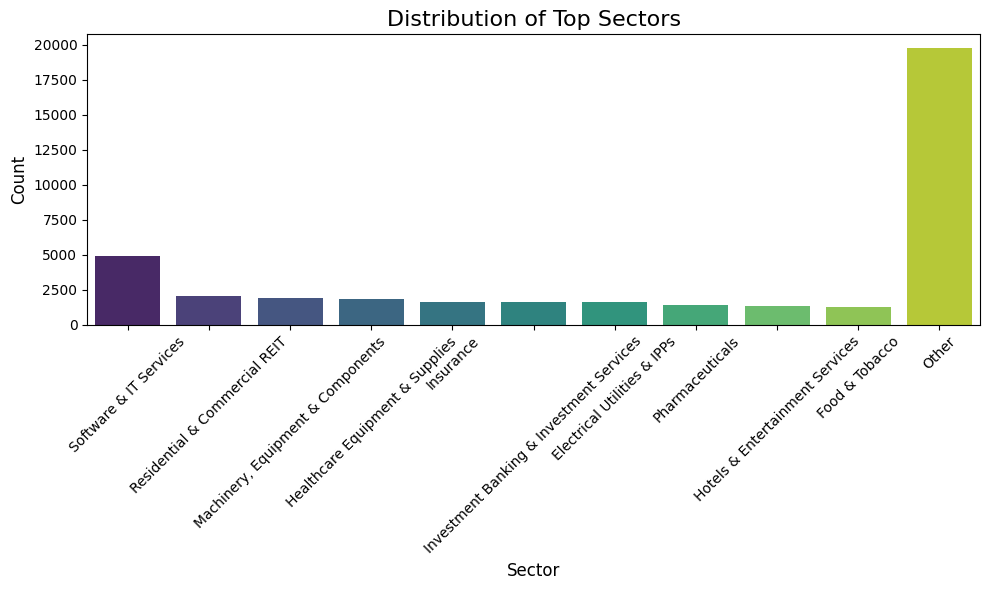

In [50]:
# Group smaller sectors into "Other" for better visualization
top_sectors = df['Sector'].value_counts().nlargest(10)  # Top 10 sectors
df['Sector (Grouped)'] = df['Sector'].apply(lambda x: x if x in top_sectors.index else 'Other')

# Plot the grouped sector distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sector (Grouped)', order=top_sectors.index.tolist() + ['Other'], palette='viridis')
plt.title("Distribution of Top Sectors", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

The above plot focus on top sectors , by grouping smaller sectors into "other", the plot highlights the top 10 most frequest sectors.

In [51]:
# Select the top 10 and bottom 10 sectors by average P/E ratio
top_10_sectors = sector_avg_pe.nlargest(10)
bottom_10_sectors = sector_avg_pe.nsmallest(10)

# Combine top and bottom sectors into one DataFrame
selected_sectors = pd.concat([top_10_sectors, bottom_10_sectors])

# Plot the selected sectors
plt.figure(figsize=(12, 6))
selected_sectors.plot(kind='bar', color='skyblue')
plt.title("Top and Bottom Sectors by Average P/E Ratio", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Average P/E Ratio", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

NameError: name 'sector_avg_pe' is not defined

The plot shows the top 10 sectors with the highest average P/E ratios (e.g., Healthcare Equipment & Supplies, Residential & Commercial REIT) and the bottom 10 sectors with the lowest average P/E ratios (e.g., Real Estate Operations, Freight & Logistics Services). Sectors with high P/E ratios may indicate industries with high growth expectations, while those with low P/E ratios may represent undervalued or low-growth industries.

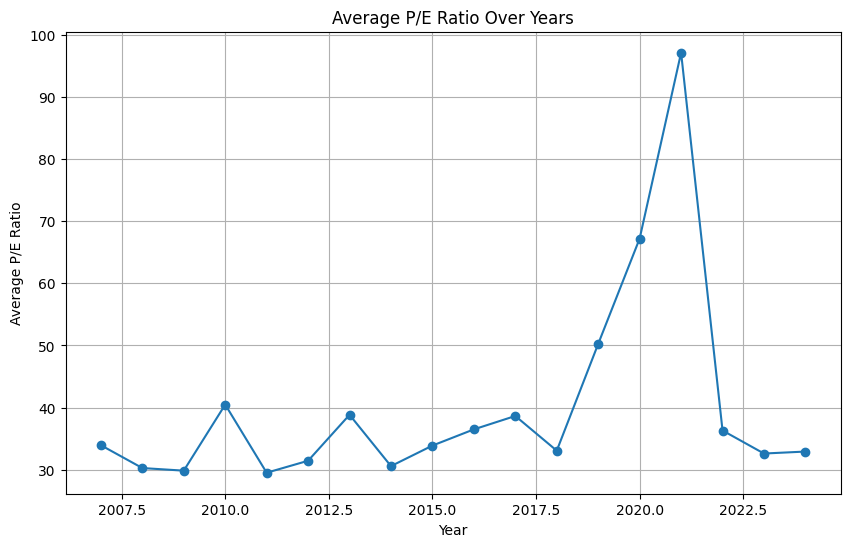

In [34]:
# Step 12: Time-series analysis
yearly_avg_pe = df.groupby('Year')['P/E'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pe.index, yearly_avg_pe.values, marker='o')
plt.title("Average P/E Ratio Over Years")
plt.xlabel("Year")
plt.ylabel("Average P/E Ratio")
plt.grid()
plt.show()

This line plot shows the average P/E ratio over the years. The P/E ratio remained relatively stable between 2007 and 2019, fluctuating around 30–40. However, there was a sharp spike in 2020, likely due to market disruptions (COVID-19 pandemic), where stock prices increased disproportionately to earnings. After 2020, the P/E ratio dropped significantly and stabilized at lower levels in subsequent years.

In [ ]:
# Calculate additional metrics for sectors
sector_metrics = df.groupby('Sector').agg({
    'P/E': ['mean', 'median', 'count']
}).reset_index()
sector_metrics.columns = ['Sector', 'Average P/E Ratio', 'Median P/E Ratio', 'Count of Stocks']

# Select top and bottom sectors
top_10_sectors = sector_metrics.nlargest(10, 'Average P/E Ratio')
bottom_10_sectors = sector_metrics.nsmallest(10, 'Average P/E Ratio')

# Combine top and bottom sectors
expanded_sector_table = pd.concat([top_10_sectors, bottom_10_sectors])
print(expanded_sector_table)

The above table highlights the sectors with the highest and lowest average P/E ratios, along with their median P/E ratios and the number of stocks in each sector, providing insights into sector-level valuation trends

In [ ]:
# Calculate additional metrics for years
yearly_metrics = df.groupby('Year').agg({
    'P/E': ['mean', 'median', 'std']
}).reset_index()
yearly_metrics.columns = ['Year', 'Average P/E Ratio', 'Median P/E Ratio', 'Standard Deviation']

print(yearly_metrics)

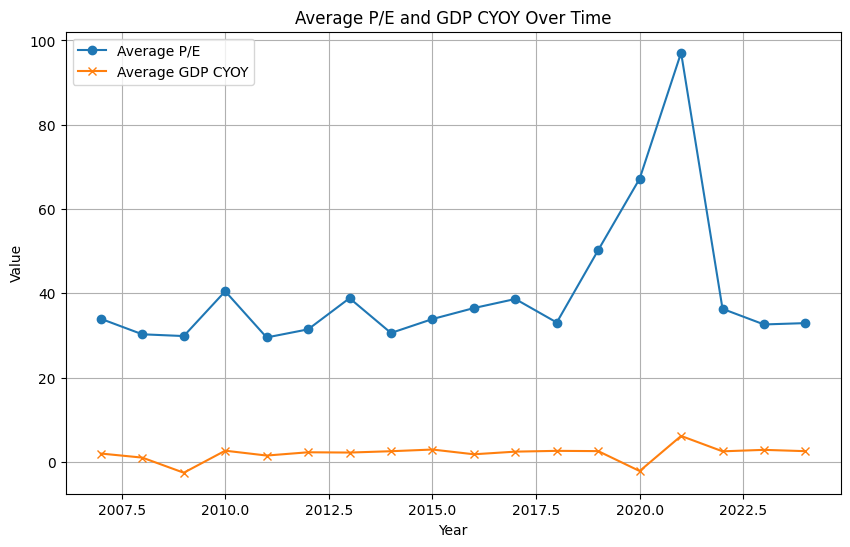

In [35]:
yearly_avg_pe = df.groupby('Year')['P/E'].mean()
yearly_avg_gdp_cyoy = df.groupby('Year')['GDP CYOY Index'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pe.index, yearly_avg_pe.values, label='Average P/E', marker='o')
plt.plot(yearly_avg_gdp_cyoy.index, yearly_avg_gdp_cyoy.values, label='Average GDP CYOY', marker='x')
plt.title('Average P/E and GDP CYOY Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

The table shows the yearly average, median, and standard deviation of P/E ratios, capturing trends and variability in stock valuations over time.



In [ ]:
#saving the final df to cleaned data version v1

df.to_csv("../Data/cleaning_v1.csv", index=False)


In [ ]:
# Summary statistics for continuous variables
continuous_vars = [
    'Market Value (%)', 'P/E', 'P/CF', 'P/B', 'Debt/Equity',
    'ROE', 'ROA', 'Profit Margin', 'FCF Gr', 'EBITDA Gr', 'Net Inc Gr',
    'GDP CYOY Index', 'CPI YOY Index', 'PPI YOY Index', 'VIX Index'
]

continuous_summary = df[continuous_vars].describe().T
continuous_summary['Skewness'] = df[continuous_vars].skew()
continuous_summary['Kurtosis'] = df[continuous_vars].kurt()
print(continuous_summary)